In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
n_words = 5000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=n_words)

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 1000

#https://keras.io/api/datasets/imdb/

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


17464789/17464789 [==============================] - 5s 0us/step


In [6]:
#wyświetl pierwszy element zbioru X_train
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
#wyświetl pierwszy element zbioru y_train
print(y_train[0])

1


In [4]:
#ta komórka słuzy dopełeniu ciągów wyrazów. Sieć ma stałą wielkość pierwszej warstwy. Zadania nie mają stałej 
#długości. Dlatego, każde zdanie, które będzie miało mniej niż 100 wyrazów dopełniamy zerami.

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 100

X_train_pad = pad_sequences(X_train, maxlen=max_words, padding="post")
X_test_pad = pad_sequences(X_test, maxlen=max_words, padding="post")

In [8]:
#kluczowa jest tu warstwa Embedding, w której ustawiamy wielkość słownika, w ilu wymiarach chcemy umieścić słowa 
#Na koniec ustawiamy jak długie są zdania, my ustaliliśmy, że mają 100 wyrazów.

from tensorflow.keras.layers import Embedding, Flatten
model = Sequential()
model.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           80000     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                102464    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 182,529
Trainable params: 182,529
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
782/782 [==============================] - 28s 22ms/step - loss: 0.4388 - accuracy: 0.7844 - val_loss: 0.3433 - val_accuracy: 0.8474
Epoch 2/1000
782/782 [==============================] - 13s 17ms/step - loss: 0.2174 - accuracy: 0.9161 - val_loss: 0.4048 - val_accuracy: 0.8287
Epoch 3/1000
782/782 [==============================] - 13s 16ms/step - loss: 0.0737 - accuracy: 0.9779 - val_loss: 0.5697 - val_accuracy: 0.8186
Epoch 4/1000
782/782 [==============================] - 14s 18ms/step - loss: 0.0160 - accuracy: 0.9967 - val_loss: 0.7574 - val_accuracy: 0.8140
Epoch 5/1000
782/782 [==============================] - 14s 18ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 0.8459 - val_accuracy: 0.8178
Epoch 6/1000
782/782 [==============================] - 14s 18ms/step - loss: 6.9650e-04 - accuracy: 1.0000 - val_loss: 0.9113 - val_accuracy: 0.8187


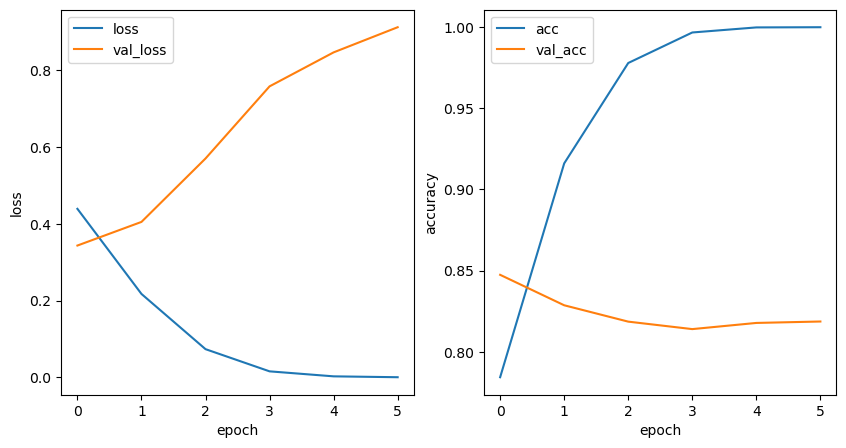

In [9]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()